In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
%matplotlib inline

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
X = df.iloc[:,2:4].values
y = df.iloc[:,4].values

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler(feature_range=(0, 1))
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 2), (100, 2), (300,), (100,))

# Model Code

In [40]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

In [182]:
def bpn(epochs, learning_rate, X_train, y_train):
    
    V = np.random.randn(X_train.shape[1], 4)  #4 is the number of neuron in hidden layer
    W = np.random.randn(4, 1)  #w is another set of weight,  4 is hidden layer, 1 is output layer
    Loss = []
    
    for i in range(epochs):
        
        for j in range(X_train.shape[0]):
            
            x = np.array(X_train[j], ndmin=2)
            A = np.dot(x, V)
            B = sigmoid(A)
            C = np.dot(B, W)
            P = sigmoid(C)
            y = np.array(y_train[j], ndmin=2)    # claculation of the cost/loss function
            L = 0.5 * (y - P) ** 2
            
            dLdP = -(y - P)
            dPdC = sigmoid(C) * (1-sigmoid(C))
            dCdW = B.T 
            dLdW = np.dot(dCdW, dLdP * dPdC)    #dL/dW
            dCdB = W.T
            dBdA = sigmoid(A) * (1-sigmoid(A))
            dAdV = x.T
            dLdV = np.dot(dAdV, np.dot(dLdP * dPdC, dCdB) * dBdA)    #dL/dV
            
            W = W - (learning_rate * dLdW)        # updating weights 
            V = V - (learning_rate * dLdV)
        print('Epoch:',i+1,' -----> Loss:',L.item(0))
        Loss.append(L.item(0))
    
    print("---------Execution Finished Successfully---------")
    return V, W, Loss
        
        

In [201]:
def pred(V,W,X_test,threshold = 0.5):
    y_pred = []
    test_loss = []
    for j in range(X_test.shape[0]): 
            x = np.array(X_train[j], ndmin=2)
            A = np.dot(x, V)
            B = sigmoid(A)
            C = np.dot(B, W)
            P = sigmoid(C)
            
            y = np.array(y_train[j], ndmin=2)    # claculation of the cost/loss function
            L = 0.5 * (y - P) ** 2
            test_loss.append(L.item(0))
            
            if P.item(0) >= threshold:
                y_pred.append(1)
            else:
                y_pred.append(0)
                
                
    return np.array(y_pred), test_loss

In [229]:
final_V, final_W, Loss = bpn(500, 0.01, X_train, y_train)

Epoch: 1  -----> Loss: 0.2294634453636319
Epoch: 2  -----> Loss: 0.20136773971319336
Epoch: 3  -----> Loss: 0.178196263222392
Epoch: 4  -----> Loss: 0.16003813164553074
Epoch: 5  -----> Loss: 0.14617824861152207
Epoch: 6  -----> Loss: 0.13569739435755096
Epoch: 7  -----> Loss: 0.12777062157650432
Epoch: 8  -----> Loss: 0.12174865674250165
Epoch: 9  -----> Loss: 0.11714709313127111
Epoch: 10  -----> Loss: 0.11361120976837635
Epoch: 11  -----> Loss: 0.1108817529947171
Epoch: 12  -----> Loss: 0.10876809299798255
Epoch: 13  -----> Loss: 0.10712871719265518
Epoch: 14  -----> Loss: 0.10585745175556208
Epoch: 15  -----> Loss: 0.1048737962365058
Epoch: 16  -----> Loss: 0.10411611831789143
Epoch: 17  -----> Loss: 0.10353681865356397
Epoch: 18  -----> Loss: 0.10309885510558918
Epoch: 19  -----> Loss: 0.10277321230150765
Epoch: 20  -----> Loss: 0.10253703581695933
Epoch: 21  -----> Loss: 0.10237223955444334
Epoch: 22  -----> Loss: 0.10226445450354993
Epoch: 23  -----> Loss: 0.10220222704937756
Ep

In [230]:
y_pred, t_loss = pred(final_V, final_W, X_test)

In [231]:
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0])

# Evaluation

In [232]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
cm

array([[45, 23],
       [19, 13]], dtype=int64)

In [233]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])*100
print('Accuracy = ',accuracy,'%')

Accuracy =  57.99999999999999 %


# Loss Curve

In [234]:
output = pd.DataFrame(Loss,columns =['Training_Loss'])
output.index = output.index + 1
output['Test_Loss'] = pd.DataFrame(t_loss)

In [235]:
output

,Training_Loss,Test_Loss
1,0.229463,0.174461
2,0.201368,0.051433
3,0.178196,0.147125
4,0.160038,0.101345
5,0.146178,0.032410
...,...,...
496,0.034940,NaN
497,0.034903,NaN
498,0.034866,NaN
499,0.034829,NaN


No handles with labels found to put in legend.


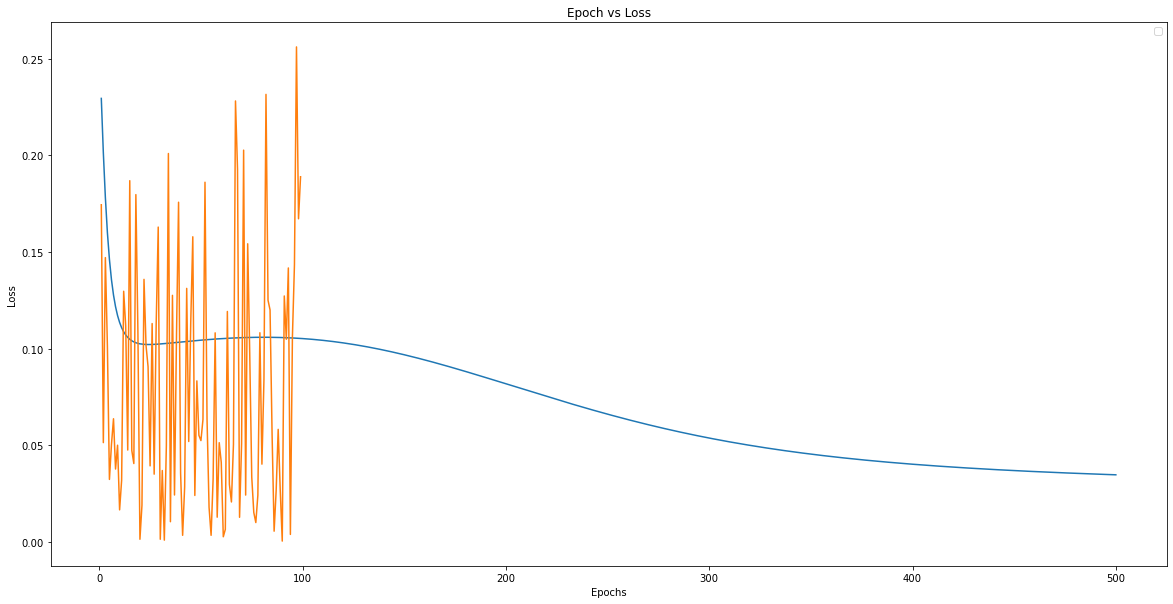

In [236]:
plt.figure(figsize=(20,10))
plt.plot(output['Training_Loss'])
plt.plot(output['Test_Loss'])
plt.title('Epoch vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
class Layer:
    def __init__(self, n_rows, n_features):
        self.weights = np.random.randn(n_rows,n_features)
        self.biases = np.zeros((1,n_features))
    
    def forward(self, inputs):
        self.output = np.dot(inputs,self.weights) +self.biases
        output = self.sigmoid(self.output)
        return output
    
    def sigmoid(self, s, deriv=False):
        if (deriv == True):
            return s * (1 - s)
        return 1/(1 + np.exp(-s))
    
    
    def backward_last(self, inputs, actual_output, output):
        self.output_error = actual_output - output 
        self.output_delta = self.output_error * self.sigmoid(output, deriv=True)
        self.weights += self.weights.T.dot(self.output_delta)
        output_delta = self.output_delta
        return output_delta

    
    def backward(self, output_delta, inputs):
        self.layer_error = self.weights.dot(output_delta) 
        self.layer_delta = self.layer_error * self.sigmoid(self.weights, deriv=True) 
        self.weights += 0.01*self.layer_delta
        #print(self.weights)
        


In [ ]:
layer1 = Layer(2,3)

In [ ]:
layer2 = Layer(3,1)

In [ ]:
for i in range(100):
    output1 = layer1.forward(X)
    output2 = layer2.forward(output1)
    error2 = layer2.backward_last(X,y,output2)
    layer1.backward(error2,X)
    print()

In [ ]:
output1 = layer1.forward(X)
output2 = layer2.forward(output1)

In [ ]:
output2